First we're going to import some libraries:
- numpy for matrix calculations;
- tensorflow for getting the fashion MNIST dataset;
- matplotlib.pyplot for data visualisation.

Then we're going to get our data and normalise it. \
Then we're going to split it into train, validation and test sets. \
The fashion MNIST have pixel values from 0 to 255, and these need to be adjusted to be from 0 to 1.

In [6]:
# Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Getting our data in the way we're given it
(X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Seeing the shape of the data to see how it should be partitioned into train, validation and test sets
print("X shape", X.shape)
print("y shape", y.shape)
print("X test shape", X_test.shape)
print("y test shape", y_test.shape)

2023-01-18 17:17:17.034940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 17:17:17.571897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 17:17:17.571961: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 17:17:18.851952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

X shape (60000, 28, 28)
y shape (60000,)
X test shape (10000, 28, 28)
y test shape (10000,)


In [7]:
# Get the number of examples in X
N = X.shape[0]

# Declare the number of training examples and validation examples you want
num_val = 10000
num_train = N - num_val

# Normalise the data by dividing by 255
X = X/255
y = y*1
X_test = X_test/255
y_test = y_test*1

# Get the training set as a random selection from the set X
mask = np.random.choice(N, num_train + num_val, replace=False)
X_train = X[mask[:num_train]]
y_train = y[mask[:num_train]]
X_val = X[mask[num_train:]]
y_val = y[mask[num_train:]]

Data Visualisation

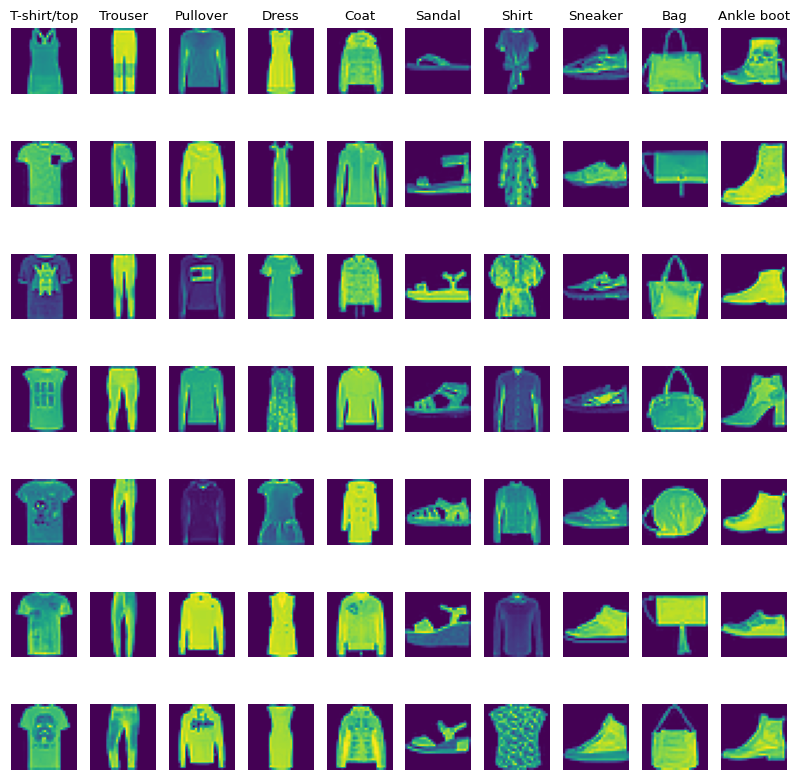

In [8]:
# Get labels for all the examples, according to y_test output
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.rcParams.update({'font.size': 8}) # Set font size.
plt.figure(figsize=(10,10)) # Set figure size


# Print the images
num_classes = len(classes)
samples_per_class = 7
for t, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == t)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + t + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

From above, you can see that shirts, coats, and pullovers look very similar, as do ankle boots and sneakers. We may do some testing later to see if the model indeed finds it hard to label these correctly. 

In [9]:
# Import my neural network module.
import network
from network import NeuralNetwork

# Reload the import bc ipynb doesn't update changes to network.py.
# only after it's run once, if it's stuck
import importlib
importlib.reload(network)

# Set the parameters for the layers
dims = (784, 250, 50, 10)
afs = ("s", "s", "s")
model = NeuralNetwork(dims, afs)

Epoch:  1
[-0.29 -0.98 -0.07 -0.48 -0.89 -0.88 -0.13 -0.69 0.61 -0.44]
Error sum:  -4.235942815967925 Absolute error sum:  5.459891897589375
Sum of S at layer1: 0.16678126580822422
Sum of S at layer2: 0.5763165550415076
Sum of S at layer3: 1.0193978077106296
[-0.18 0.86 -0.04 -0.04 -0.26 -0.07 -0.10 -0.09 -0.04 -0.04]
Error sum:  0.003975398933247928 Absolute error sum:  1.7215354694914178
Sum of S at layer1: -0.09204989912707356
Sum of S at layer2: 0.003979102931128598
Sum of S at layer3: 0.005443846539091896
[-0.09 -0.14 -0.04 -0.11 -0.04 -0.19 -0.08 -0.06 0.98 -0.10]
Error sum:  0.126435719126349 Absolute error sum:  1.8264387380083589
Sum of S at layer1: 0.002652027503352125
Sum of S at layer2: 0.025386276973872187
Sum of S at layer3: 0.1262937956643903
[-0.09 -0.14 -0.11 0.96 -0.08 -0.05 -0.17 -0.05 -0.02 -0.07]
Error sum:  0.16644906307597188 Absolute error sum:  1.757223464126157
Sum of S at layer1: 0.029183381401331126
Sum of S at layer2: -0.016383043534153572
Sum of S at layer

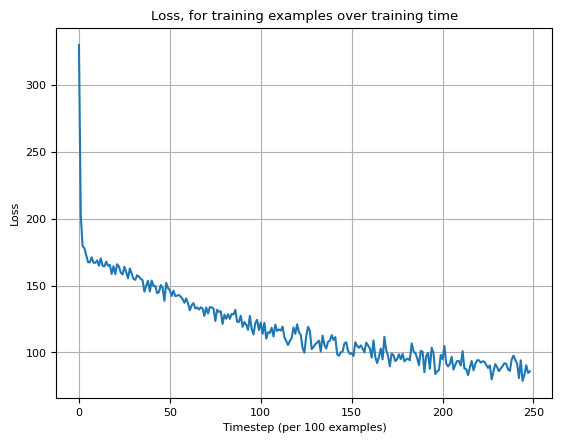

In [16]:
# Clear the model to retrain
model.reset()

# Get data into a dictionary, reshape X_train 
data = {}
data["X"] = X_train.reshape(X_train.shape[0], 784)[:5000]
data["y"] = y_train[:5000]

# Train the model
loss_hist = model.train(data=data, num_epoch=5)

# Plot the loss history
t = list(range(len(loss_hist)))

# figure and axis
fig, ax = plt.subplots()
ax.plot(t, loss_hist)


# Set axis labels
ax.set(
    xlabel="Timestep (per 100 examples)", 
    ylabel="Loss",
    title="Loss, for training examples over training time"
)
ax.grid()

plt.show()

In [17]:

# check accuracy
data_val = {}
data_val["X"] = X_val.reshape(X_val.shape[0], -1)
data_val["y"] = y_val

accuracy = model.checkAccuracy(data=data)

print(accuracy)

0.7972
